# Imports

In [14]:
import joblib
import numpy as np
import matplotlib.pyplot as plt

# Keras
from keras.datasets import mnist
from keras.utils import np_utils

# Model
from api import __version__
from api.core.generic import Model
from api.core.layers import Dense
from api.core.optimizers import GradientDescent

# Read and preprocess data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

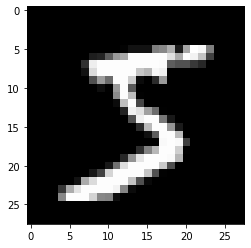

In [3]:
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'));

In [7]:
num_pixels = X_train.shape[1] * X_train.shape[2]

# flatten 28*28 images to a 784 vector for each image
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

X_train = np.expand_dims(X_train, 1)
X_test = np.expand_dims(X_test, 1)
y_train = np.expand_dims(y_train, 1)
y_test = np.expand_dims(y_test, 1)

num_classes = y_test.shape[2]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 1, 784), (10000, 1, 784), (60000, 1, 10), (10000, 1, 10))

# Model

In [8]:
model = Model(input_shape=(1, num_pixels))

model.add(Dense(784, activation='relu'))
model.add(Dense(98, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(GradientDescent(0.3, clipnorm=1), loss='categorical_cross_entropy')

model.fit(X_train, y_train, validation_split=0.2, batch_size=200, verbosity=1, epochs=10)

  0%|          | 0/10 [00:00<?, ?it/s]

In [9]:
np.argmax(model.predict([X_train[0]]))

  0%|          | 0/1 [00:00<?, ?it/s]

5

In [10]:
model.predict(X_test, y_test).shape

  0%|          | 0/1 [00:00<?, ?it/s]

(10000, 1, 10)

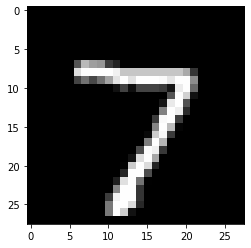

In [4]:
plt.imshow(X_test[0], cmap=plt.get_cmap('gray'));

In [11]:
np.argmax(model.predict([X_test[0]]))

  0%|          | 0/1 [00:00<?, ?it/s]

7

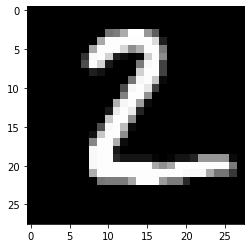

In [5]:
plt.imshow(X_test[1], cmap=plt.get_cmap('gray'));

In [12]:
np.argmax(model.predict([X_test[1]]))

  0%|          | 0/1 [00:00<?, ?it/s]

2

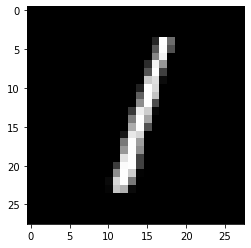

In [6]:
plt.imshow(X_test[2], cmap=plt.get_cmap('gray'));

In [13]:
np.argmax(model.predict([X_test[2]]))

  0%|          | 0/1 [00:00<?, ?it/s]

1

# Export model

In [15]:
path = f'../api/model/trained_model-{__version__}.pkl'
joblib.dump(model, path, compress=3)

['../api/model/trained_model-0.0.1.pkl']